In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [258]:
class KMeans:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X: np.ndarray):
        '''
        output will be a vector consisting of labels for the corresponding training data
        '''
        n_samples, _ = X.shape
        # take k random centroids
        centroids_idx = np.random.choice(n_samples, self.k, replace=False)
        centroids = X[centroids_idx]
        clusters = np.zeros(n_samples, dtype=np.int32)

        for _ in range(10000):
            # calculate the distance of data points from each centroids
            for sample_idx, sample in enumerate(X):
                distances = []
                for centroid in centroids:
                    distance = self._distance(centroid, sample)
                    distances.append(distance)
                # assign the data point closest to the centroid
                closest_centroid_idx = np.argmin(distances)
                clusters[sample_idx] = closest_centroid_idx

            # calculate new centroids by taking mean
            new_centroids = []
            for i in range(self.k):
                new_centroid = X[np.where(clusters == i)].sum(axis=0) / np.sum(clusters == i)
                new_centroids.append(new_centroid)

            if np.array_equal(centroids, new_centroids):
                break

            centroids = np.copy(new_centroids)

        return clusters

    def _distance(self, x1, x2):
        return np.sqrt(np.sum(np.square(x1 - x2)))

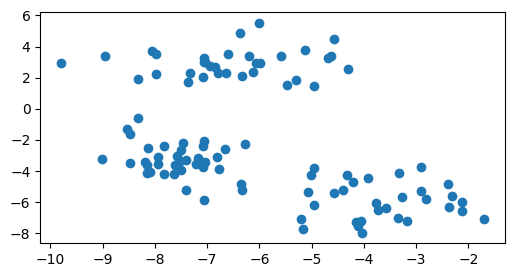

In [271]:
data = datasets.make_blobs(n_samples=100, n_features=2, cluster_std=1.15, shuffle=False)

X, y = data[0], data[1]
plt.figure(figsize=(6, 3))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [272]:
clf = KMeans(k=3)
clusters = clf.fit(X)

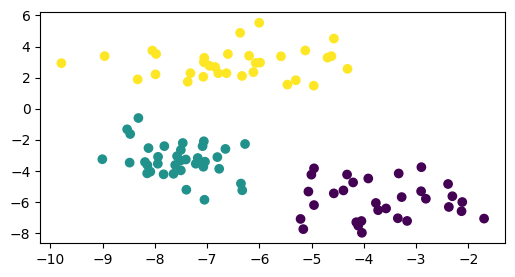

In [274]:
X, y = data[0], data[1]
plt.figure(figsize=(6, 3))
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()